In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
nodes_df = pd.read_csv('nodes.csv')

nodes_df.head()

,Label,name,code,region,sub_region,_pos,lat,lng,Abb
0,0,Afghanistan,4,Asia,Southern Asia,"array([1.83174148, 1.86242262])",33.939110,67.709953,AFG
1,1,Albania,8,Europe,Southern Europe,"array([1.89105956, 2.05459683])",41.153332,20.168331,ALB
2,2,Algeria,12,Africa,Northern Africa,"array([1.90130528, 1.98917661])",28.033886,1.659626,DZA
3,3,American Samoa,16,Oceania,Polynesia,"array([1.97167436, 2.13972604])",-14.270972,-170.132217,ASM
4,4,Andorra,20,Europe,Southern Europe,"array([1.70167317, 1.89743272])",42.546245,1.601554,AND


In [3]:
# Load the edges.csv file into a DataFrame
edges_df = pd.read_csv('edges.csv')

edges_df.head()


,source,target,migration_1990_total,migration_1990_male,migration_1990_female,migration_1995_total,migration_1995_male,migration_1995_female,migration_2000_total,migration_2000_male,migration_2000_female,migration_2005_total,migration_2005_male,migration_2005_female,migration_2010_total,migration_2010_male,migration_2010_female,migration_2015_total,migration_2015_male,migration_2015_female
0,0,64,237,194,43,188,150,38,154,117,37,183,142,41,198,152,46,235,173,62
1,0,118,677,556,121,452,351,101,236,155,81,259,187,72,284,206,78,320,231,89
2,0,142,64,26,38,61,25,36,58,23,35,45,18,27,43,18,25,39,17,22
3,0,191,59,37,22,36,24,12,30,20,10,47,27,20,69,41,28,83,50,33
4,0,202,8485,3726,4759,12248,5518,6730,17118,7874,9244,12636,5687,6949,8900,3906,4994,7587,3279,4308


In [13]:
edges_df.columns

Index(['source', 'target', 'migration_1990_total', 'migration_1990_male',
       'migration_1990_female', 'migration_1995_total', 'migration_1995_male',
       'migration_1995_female', 'migration_2000_total', 'migration_2000_male',
       'migration_2000_female', 'migration_2005_total', 'migration_2005_male',
       'migration_2005_female', 'migration_2010_total', 'migration_2010_male',
       'migration_2010_female', 'migration_2015_total', 'migration_2015_male',
       'migration_2015_female'],
      dtype='object')

In [4]:
import networkx as nx

# Create a directed graph
graph = nx.DiGraph()

# Add nodes to the graph
for index, row in nodes_df.iterrows():
    graph.add_node(row['Label'], name=row['Abb'])

# Add edges with weights and attributes
for index, row in edges_df.iterrows():
    source = row['source']
    target = row['target']
    weight = row['migration_1990_total']
    if weight != 0:
        female_ratio = row['migration_1990_female'] / weight
    else:
        female_ratio = 0
    graph.add_edge(source, target, weight=weight, female_ratio=female_ratio)

# Check the basic information about the graph
graph_info = nx.info(graph)
graph_info

C:\Users\PA\AppData\Local\Temp\ipykernel_19584\2458243203.py:22: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  graph_info = nx.info(graph)


'DiGraph with 232 nodes and 11228 edges'

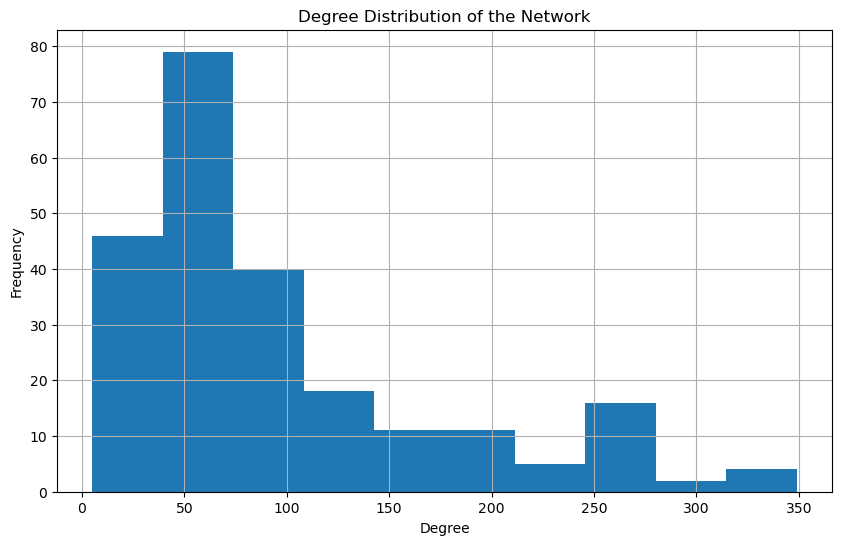

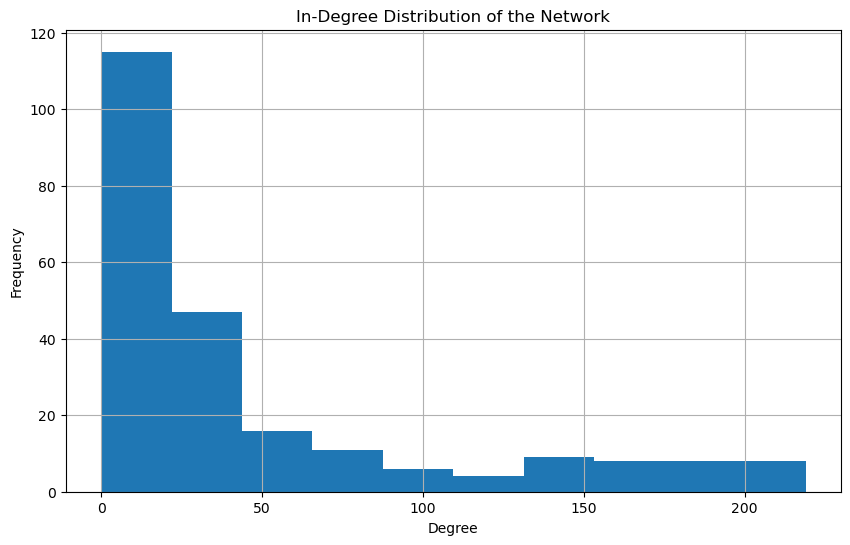

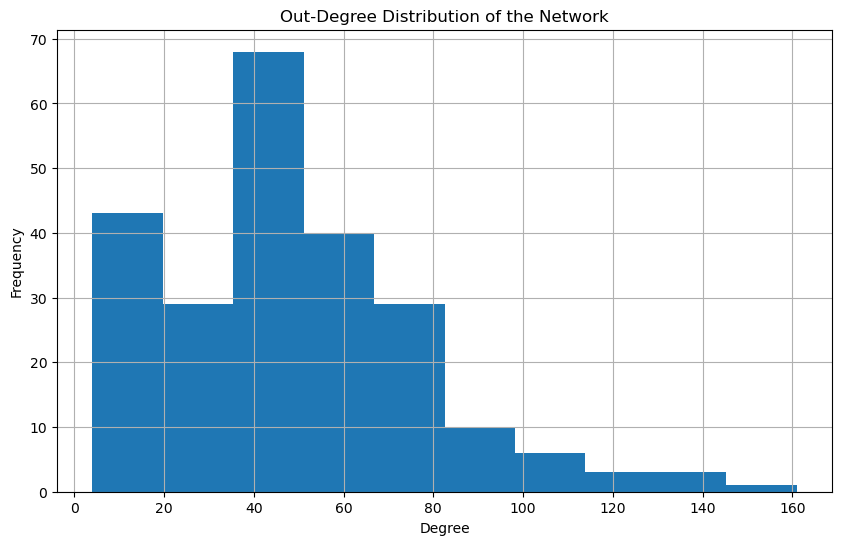

In [16]:
import matplotlib.pyplot as plt

# using bins to plot the degree distribution
def plot_degree_distribution(graph, distribution_type, title):
    if distribution_type == 'total':
        degrees = [graph.degree(n) for n in graph.nodes()]
    elif distribution_type == 'in':
        degrees = [graph.in_degree(n) for n in graph.nodes()]
    elif distribution_type == 'out':
        degrees = [graph.out_degree(n) for n in graph.nodes()]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=10)
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plotting degree distribution, in-degree distribution, and out-degree distribution
plot_degree_distribution(graph, 'total', 'Degree Distribution of the Network')
plot_degree_distribution(graph, 'in', 'In-Degree Distribution of the Network')
plot_degree_distribution(graph, 'out', 'Out-Degree Distribution of the Network')

In [6]:
# Computing various network measures for the weighted-directed graph
measures = {}

# Degree Centrality (Unweighted)
measures['degree_centrality'] = nx.degree_centrality(graph)

# Weighted Degree Centrality
measures['weighted_degree_centrality'] = {n: sum(weight for _, _, weight in graph.edges(n, data='weight')) for n in graph.nodes()}

# Closeness Centrality (Unweighted)
measures['closeness_centrality'] = nx.closeness_centrality(graph)

# Betweenness Centrality (Unweighted)
measures['betweenness_centrality'] = nx.betweenness_centrality(graph)

# Clustering Coefficient (Unweighted)
measures['clustering_coefficient'] = nx.clustering(graph)

# Average Path Length (Unweighted)
try:
    measures['average_path_length'] = nx.average_shortest_path_length(graph)
except nx.NetworkXError:  # This error occurs if the graph is not connected
    measures['average_path_length'] = 'Graph is not connected, cannot compute average path length.'

# Network Density
measures['network_density'] = nx.density(graph)

# Modularity (Requires community detection, which is complex. Not computed here.)

# PageRank (Unweighted)
measures['pagerank'] = nx.pagerank(graph)

# Assortativity Coefficient
try:
    measures['assortativity_coefficient'] = nx.degree_assortativity_coefficient(graph)
except nx.NetworkXError:  # This error occurs in certain network configurations
    measures['assortativity_coefficient'] = 'Cannot compute assortativity coefficient for this graph.'

# Network Diameter and Radius (Requires the graph to be connected. Not computed here.)

# Eigenvector Centrality (Unweighted)
measures['eigenvector_centrality'] = nx.eigenvector_centrality(graph, max_iter=1000)

# Summary of calculated measures
measures_summary = {key: (value if isinstance(value, str) else 'Calculated') for key, value in measures.items()}
measures_summary


{'degree_centrality': 'Calculated',
 'weighted_degree_centrality': 'Calculated',
 'closeness_centrality': 'Calculated',
 'betweenness_centrality': 'Calculated',
 'clustering_coefficient': 'Calculated',
 'average_path_length': 'Calculated',
 'network_density': 'Calculated',
 'pagerank': 'Calculated',
 'assortativity_coefficient': 'Calculated',
 'eigenvector_centrality': 'Calculated'}

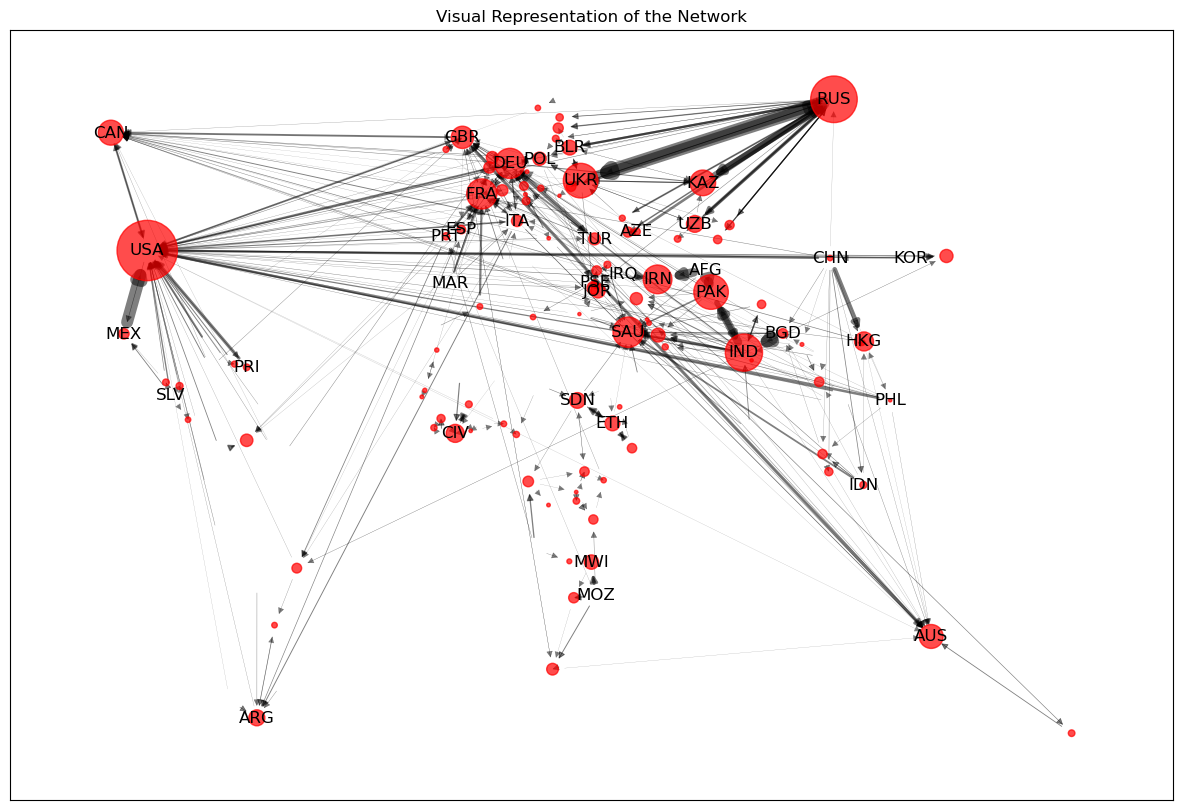

In [8]:
# Step 1: Remove all edges with a weight lower than 50000
edges_to_remove = [(u, v) for u, v, d in graph.edges(data=True) if d['weight'] < 50000]
graph.remove_edges_from(edges_to_remove)

# Step 2: Remove all nodes without any link
nodes_to_remove = [n for n in graph.nodes() if graph.degree(n) == 0]
graph.remove_nodes_from(nodes_to_remove)

# Step 3: Adjust the size of the nodes based on the In-degree weights
node_sizes = [graph.in_degree(n, weight='weight')/10000 for n in graph.nodes()]

# Step 4: Adjust the thickness of the links based on their weights
edge_weights = [d['weight'] / 500000 for _, _, d in graph.edges(data=True)] # Scale down for visualization

# Step 5: Adjust the positions of the nodes based on 'lat' and 'lng'
node_positions = {row['Label']: (row['lng'], row['lat']) for index, row in nodes_df.iterrows() if row['Label'] in graph.nodes}

# Step 6: Labels for nodes with a high in-degree or out-degree
labels = {n: data['Abb'] for n, data in nodes_df.set_index('Label').iterrows() 
          if n in graph.nodes() and (graph.in_degree(n, weight='weight') > 1000000 or graph.out_degree(n, weight='weight') > 1000000)}

# Visualizing the network again with corrected labels
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(graph, node_positions, node_size=node_sizes, node_color='red', alpha=0.7)
nx.draw_networkx_edges(graph, node_positions, width=edge_weights, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(graph, node_positions, labels=labels, font_size=12)
plt.title("Visual Representation of the Network")
plt.show()


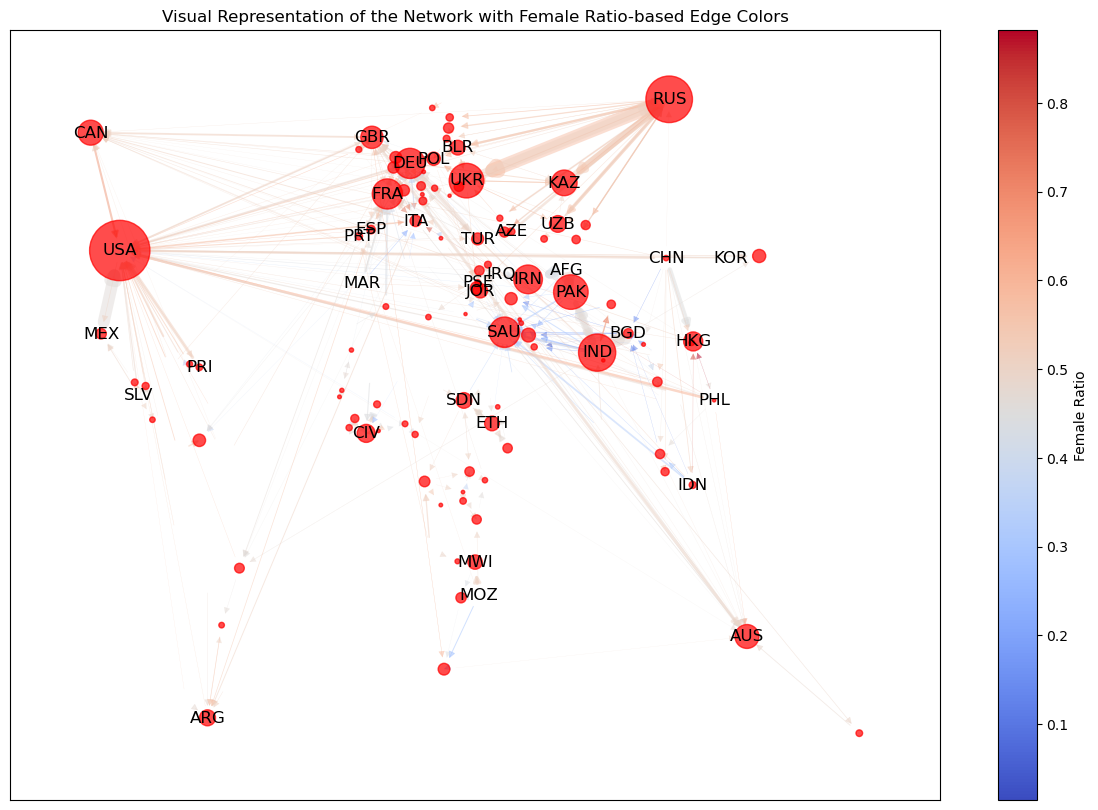

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assuming female_ratio is between 0 and 1, map these to a color scale
# For example, using a blue (low ratio) to red (high ratio) gradient
cmap = plt.get_cmap('coolwarm')

# Normalize the female ratio values to be between 0 and 1
# This step is necessary if your ratios are not already normalized
female_ratios = np.array([d['female_ratio'] for _, _, d in graph.edges(data=True)])
norm = mcolors.Normalize(vmin=female_ratios.min(), vmax=female_ratios.max())

# Create a list of colors for each edge based on the female_ratio
edge_colors = [cmap(norm(d['female_ratio'])) for _, _, d in graph.edges(data=True)]

# Visualizing the network
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(graph, node_positions, node_size=node_sizes, node_color='red', alpha=0.7)
nx.draw_networkx_edges(graph, node_positions, width=edge_weights, alpha=0.5, edge_color=edge_colors)
nx.draw_networkx_labels(graph, node_positions, labels=labels, font_size=12)
plt.title("Visual Representation of the Network with Female Ratio-based Edge Colors")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), orientation='vertical', label='Female Ratio')
plt.show()


In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import networkx as nx

def visualize_migration_graph(graph, nodes_df, year):
    # Update edge weights to the specified year's migration data
    edge_weights = [d[f'migration_{str(year)}_total'] / 500000 for _, _, d in graph.edges(data=True)]  # Adjust scaling as needed

    # Map these weights to a color scale
    cmap = plt.get_cmap('viridis')  # Choose a colormap that fits your data
    migration_values = np.array(edge_weights)
    norm = mcolors.Normalize(vmin=migration_values.min(), vmax=migration_values.max())

    edge_colors = [cmap(norm(weight)) for weight in edge_weights]

    # Node positions based on 'lat' and 'lng'
    node_positions = {row['Label']: (row['lng'], row['lat']) for index, row in nodes_df.iterrows() if row['Label'] in graph.nodes}

    # Node sizes and labels (as per your previous code)
    node_sizes = [graph.in_degree(n, weight='weight') / 10000 for n in graph.nodes()]
    labels = {n: data['Abb'] for n, data in nodes_df.set_index('Label').iterrows() 
              if n in graph.nodes() and (graph.in_degree(n, weight='weight') > 1000000 or graph.out_degree(n, weight='weight') > 1000000)}

    # Visualizing the network
    plt.figure(figsize=(15, 10))
    nx.draw_networkx_nodes(graph, node_positions, node_size=node_sizes, node_color='red', alpha=0.7)
    nx.draw_networkx_edges(graph, node_positions, width=edge_weights, alpha=0.5, edge_color=edge_colors)
    nx.draw_networkx_labels(graph, node_positions, labels=labels, font_size=12)
    plt.title(f"Network Visualization for {year} Migration Data")
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), orientation='vertical', label='Total Migration')
    plt.show()

# Example usage for different years
for year in [1995, 2000, 2005, 2010, 2015]:
    visualize_migration_graph(graph, nodes_df, year)


KeyError: 'migration_1995_total'

In [4]:
import pandas as pd
import networkx as nx

# Read the files into pandas dataframes
nodes_df = pd.read_csv('nodes.csv')
edges_df = pd.read_csv('edges1990.csv')

# Strip leading/trailing spaces from column names in nodes_df
nodes_df.columns = nodes_df.columns.str.strip()

# Filter edges with weight less than 50000 from the edges DataFrame
filtered_edges_df = edges_df[edges_df['Weight1990'] >= 50000]

# Create a new directed graph
G_filtered = nx.DiGraph()

# Add nodes to the new graph with the corrected attributes
for idx, row in nodes_df.iterrows():
    # Add node with available attributes
    node_attributes = {col: row[col] for col in nodes_df.columns if col != 'Label'}
    G_filtered.add_node(row['Label'], **node_attributes)

# Add filtered weighted edges to the new graph
for idx, row in filtered_edges_df.iterrows():
    G_filtered.add_edge(row['source'], row['target'], weight=row['Weight1990'])

# Now G_filtered is a weighted directed graph constructed from your data
# with edges having weights >= 50000

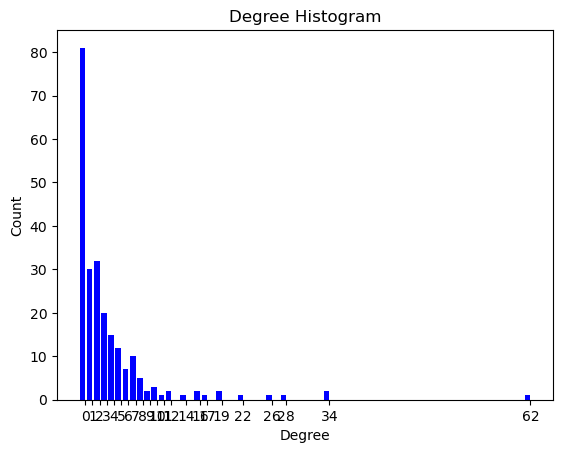

In [8]:
# pltting the degree distribution without counting the weights

import matplotlib.pyplot as plt
import collections
import numpy as np
import seaborn as sns
from scipy import stats

# degree distribution
degree_sequence = sorted([d for n, d in G_filtered.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)  
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()